In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data=pd.read_csv('Titanic.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
28.00    25
21.00    24
25.00    23
36.00    22
29.00    20
32.00    18
27.00    18
35.00    18
26.00    18
16.00    17
31.00    17
20.00    15
33.00    15
23.00    15
34.00    15
39.00    14
17.00    13
42.00    13
40.00    13
45.00    12
38.00    11
50.00    10
2.00     10
4.00     10
47.00     9
         ..
71.00     2
59.00     2
63.00     2
0.83      2
30.50     2
70.00     2
57.00     2
0.75      2
13.00     2
10.00     2
64.00     2
40.50     2
32.50     2
45.50     2
20.50     1
24.50     1
0.67      1
14.50     1
0.92      1
74.00     1
34.50     1
80.00     1
12.00     1
36.50     1
53.00     1
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [6]:
data['Cabin'].value_counts()

B96 B98            4
C23 C25 C27        4
G6                 4
D                  3
E101               3
F2                 3
F33                3
C22 C26            3
C123               2
D36                2
B22                2
B18                2
C93                2
C65                2
C2                 2
B49                2
C92                2
E121               2
E44                2
B20                2
B28                2
C52                2
B57 B59 B63 B66    2
B77                2
D26                2
D35                2
B5                 2
C78                2
C126               2
F4                 2
                  ..
E12                1
D15                1
C46                1
D48                1
C32                1
B50                1
B94                1
D6                 1
A7                 1
D45                1
D46                1
C87                1
C91                1
B82 B84            1
B79                1
B101               1
C86          

In [7]:
data.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

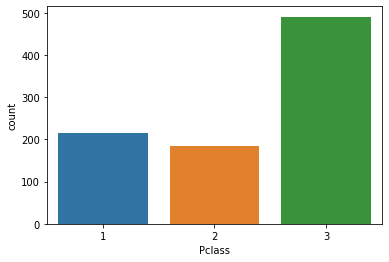

In [55]:
sns.countplot(x=data.Pclass)

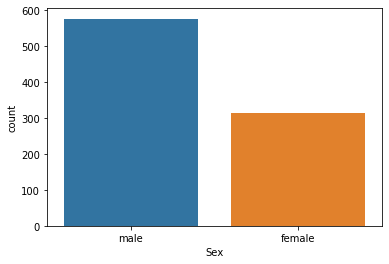

In [56]:
sns.countplot(x=data.Sex)

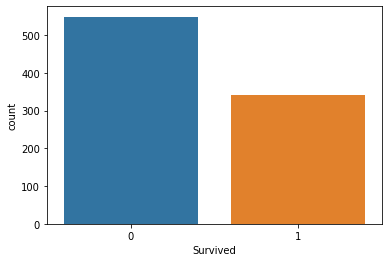

In [57]:
sns.countplot(x=data.Survived)

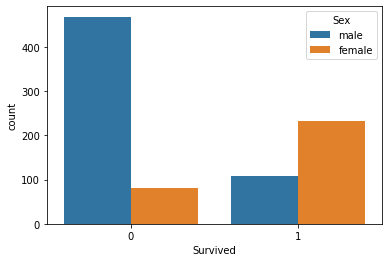

In [58]:
sns.countplot(x='Survived',hue='Sex',data=data)

In [59]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

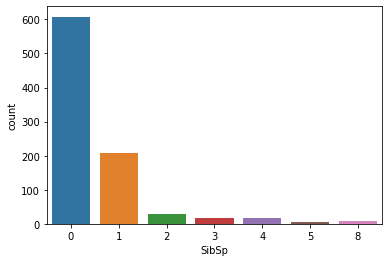

In [60]:
sns.countplot(x=data.SibSp)

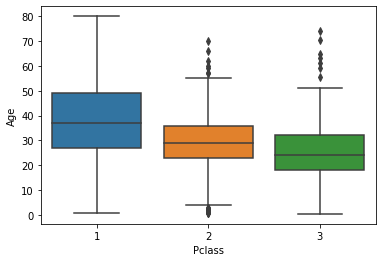

In [61]:
sns.boxplot(x='Pclass',y='Age',data=data,width=0.8)

In [8]:
def age(col):
    age=col[0]
    pclass=col[1]
    if pd.isnull(age):
        if pclass==1:
            return 37
        elif pclass==2:
            return 28
        else:
            return 25
    else:
        return age

In [9]:
data['Age']=data[['Age','Pclass']].apply(age,axis=1)

In [10]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
data.drop(columns='Cabin',inplace=True)

In [12]:
data['Embarked'].mode()

0    S
dtype: object

In [13]:
data['Embarked'].fillna('S')

0      S
1      C
2      S
3      S
4      S
5      Q
6      S
7      S
8      S
9      C
10     S
11     S
12     S
13     S
14     S
15     S
16     Q
17     S
18     S
19     C
20     S
21     S
22     Q
23     S
24     S
25     S
26     C
27     S
28     Q
29     S
      ..
861    S
862    S
863    S
864    S
865    S
866    C
867    S
868    S
869    S
870    S
871    S
872    S
873    S
874    C
875    C
876    S
877    S
878    S
879    C
880    S
881    S
882    S
883    S
884    S
885    Q
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [14]:
data.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.527097
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

In [16]:
for col in data.columns:
    if data.skew().loc[col]>0.55:
        data[col]=np.log10(data[col])

KeyError: 'Name'

In [17]:
pd.get_dummies(data,columns=['Sex','Embarked'],drop_first=True).head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1


In [18]:
data_new=data.drop(['Name','Ticket'],axis=1)

In [21]:
data_new=pd.get_dummies(data_new,columns=['Sex','Embarked'],drop_first=True)


KeyError: "None of [Index(['Sex', 'Embarked'], dtype='object')] are in the [columns]"

In [22]:
data_new.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


ImportError: cannot import name 'standardScaler' from 'sklearn.preprocessing' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\__init__.py)

In [25]:
X=data_new.drop(columns=['Survived'],axis=1)
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [26]:
Y=data_new['Survived']
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [64]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(X,Y,random_state=0,test_size=0.33)

In [65]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(x_train)
X_test=sc.transform(x_test)


In [66]:
train_y=y_train

In [67]:
train_x=pd.DataFrame(data=X_train,columns=x_train.columns)
train_x.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,-0.796817,-0.343632,-0.022088,-0.455235,-0.469509,-0.455103,0.724083,-0.315644,0.603195
1,-0.401013,-0.343632,0.512115,-0.455235,-0.469509,-0.403337,0.724083,-0.315644,0.603195
2,-1.076208,-1.534356,2.419980,-0.455235,-0.469509,0.021148,0.724083,-0.315644,0.603195
3,-1.010241,-1.534356,1.198946,-0.455235,-0.469509,-0.122762,0.724083,-0.315644,0.603195
4,1.368465,-0.343632,0.359485,-0.455235,-0.469509,-0.403337,0.724083,-0.315644,0.603195


In [68]:
test_x=pd.DataFrame(data=X_test,columns=x_test.columns)
test_x.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.184933,0.847092,-0.327346,-0.455235,-0.469509,-0.373140,0.724083,-0.315644,-1.657838
1,0.778639,0.847092,-0.327346,-0.455235,-0.469509,-0.516188,0.724083,-0.315644,0.603195
2,-0.657121,0.847092,-1.701009,2.979196,0.721246,-0.069443,0.724083,3.168128,-1.657838
3,-1.615588,-1.534356,0.588429,0.403373,-0.469509,2.361424,-1.381057,-0.315644,-1.657838
4,-0.746371,0.847092,-0.022088,-0.455235,1.912001,-0.356834,-1.381057,-0.315644,-1.657838


In [69]:
train_x.skew()

PassengerId    0.003224
Pclass        -0.585738
Age            0.453272
SibSp          3.951407
Parch          2.764016
Fare           4.887991
Sex_male      -0.658632
Embarked_Q     2.859687
Embarked_S    -1.057306
dtype: float64

In [70]:
train_x.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [71]:
for col in train_x.columns:
    if train_x.skew().loc[col]>0.55:
        train_x[col]=np.log1p(train_x[col])

In [72]:
train_x.skew()

PassengerId    0.003224
Pclass        -0.585738
Age            0.453272
SibSp          1.515373
Parch          1.519204
Fare           1.371220
Sex_male      -0.658632
Embarked_Q     2.859687
Embarked_S    -1.057306
dtype: float64

In [73]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [74]:
from sklearn.metrics import accuracy_score

In [75]:
accuracy=0
for i in range(5,100):
    x_train,x_test,y_train,y_test=tts(train_x,train_y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_y=lr.predict(x_test)
    acc_score=accuracy_score(y_test,pred_y)
    print('Accuracy score is',acc_score,'at random state',i)
    if acc_score>accuracy:
        accuracy=acc_score
        final_state=i
print('max accuracy score is ',accuracy,'at random state',final_state)
    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Accuracy score is 0.7833333333333333 at random state 5
Accuracy score is 0.7833333333333333 at random state 6
Accuracy score is 0.7666666666666667 at random state 7
Accuracy score is 0.7583333333333333 at random state 8
Accuracy score is 0.7916666666666666 at random state 9
Accuracy score is 0.775 at random state 10
Accuracy score is 0.8166666666666667 at random state 11
Accuracy score is 0.7916666666666666 at random state 12
Accuracy score is 0.85 at random state 13
Accuracy score is 0.825 at random state 14
Accuracy score is 0.8166666666666667 at random state 15
Accuracy score is 0.8166666666666667 at random state 16
Accuracy score is 0.75 at random state 17
Accuracy score is 0.8 at random state 18
Accuracy score is 0.8 at random state 19
Accuracy score is 0.7916666666666666 at random state 20
Accuracy score is 0.8083333333333333 at random state 21
Accuracy score is 0.7166666666666667 at random state 22


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Accuracy score is 0.8083333333333333 at random state 23
Accuracy score is 0.7416666666666667 at random state 24
Accuracy score is 0.8166666666666667 at random state 25
Accuracy score is 0.7833333333333333 at random state 26
Accuracy score is 0.8416666666666667 at random state 27
Accuracy score is 0.8083333333333333 at random state 28
Accuracy score is 0.8083333333333333 at random state 29
Accuracy score is 0.8083333333333333 at random state 30
Accuracy score is 0.8166666666666667 at random state 31
Accuracy score is 0.7583333333333333 at random state 32
Accuracy score is 0.875 at random state 33
Accuracy score is 0.8416666666666667 at random state 34
Accuracy score is 0.8166666666666667 at random state 35
Accuracy score is 0.7583333333333333 at random state 36
Accuracy score is 0.8083333333333333 at random state 37
Accuracy score is 0.7916666666666666 at random state 38


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Accuracy score is 0.7666666666666667 at random state 39
Accuracy score is 0.7916666666666666 at random state 40
Accuracy score is 0.825 at random state 41
Accuracy score is 0.775 at random state 42
Accuracy score is 0.7916666666666666 at random state 43
Accuracy score is 0.7916666666666666 at random state 44
Accuracy score is 0.7833333333333333 at random state 45
Accuracy score is 0.825 at random state 46
Accuracy score is 0.775 at random state 47
Accuracy score is 0.8 at random state 48
Accuracy score is 0.7833333333333333 at random state 49
Accuracy score is 0.825 at random state 50
Accuracy score is 0.8083333333333333 at random state 51
Accuracy score is 0.8083333333333333 at random state 52
Accuracy score is 0.7416666666666667 at random state 53
Accuracy score is 0.7916666666666666 at random state 54
Accuracy score is 0.825 at random state 55
Accuracy score is 0.7833333333333333 at random state 56
Accuracy score is 0.7833333333333333 at random state 57
Accuracy score is 0.791666666

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Accuracy score is 0.8416666666666667 at random state 72
Accuracy score is 0.8416666666666667 at random state 73
Accuracy score is 0.8416666666666667 at random state 74
Accuracy score is 0.7916666666666666 at random state 75
Accuracy score is 0.7333333333333333 at random state 76
Accuracy score is 0.7833333333333333 at random state 77
Accuracy score is 0.7833333333333333 at random state 78
Accuracy score is 0.8166666666666667 at random state 79
Accuracy score is 0.8166666666666667 at random state 80
Accuracy score is 0.825 at random state 81
Accuracy score is 0.7583333333333333 at random state 82
Accuracy score is 0.8083333333333333 at random state 83
Accuracy score is 0.8583333333333333 at random state 84
Accuracy score is 0.775 at random state 85
Accuracy score is 0.8416666666666667 at random state 86
Accuracy score is 0.8666666666666667 at random state 87
Accuracy score is 0.8333333333333334 at random state 88
Accuracy score is 0.7916666666666666 at random state 89
Accuracy score is 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Accuracy score is 0.825 at random state 94
Accuracy score is 0.8083333333333333 at random state 95
Accuracy score is 0.775 at random state 96
Accuracy score is 0.8 at random state 97
Accuracy score is 0.8583333333333333 at random state 98
Accuracy score is 0.7833333333333333 at random state 99
max accuracy score is  0.875 at random state 33


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [76]:
x_train,x_test,y_train,y_test=tts(train_x,train_y,test_size=0.2,random_state=33)
lr.fit(x_train,y_train)
pred_y=lr.predict(x_test)
acc_score=accuracy_score(y_test,pred_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [77]:
acc_score

0.875

In [80]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test,pred_y)
confusion

array([[71, 10],
       [ 5, 34]], dtype=int64)

In [82]:
from sklearn.svm import SVC
classifier=SVC(kernel='linear',random_state=0)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
confusion=confusion_matrix(y_test,pred_y)
confusion,accuracy

(array([[71, 10],
        [ 5, 34]], dtype=int64), 0.85)

In [83]:
from sklearn.model_selection import GridSearchCV
parameters=[{'C':[1,10,100,1000],'kernel':['linear']},
            {'C':[1,10,100,1000],'kernel':['rbf'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}]
grid_search=GridSearchCV(estimator=classifier,param_grid=parameters,scoring='accuracy',cv=10,n_jobs=-1)
grid_search=grid_search.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [84]:
accuracy=grid_search.best_score_
accuracy

0.7941176470588235

In [85]:
grid_search.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [89]:
from sklearn.ensemble import RandomForestClassifier as RFC
RFC=RFC(n_estimators=7)
RFC.fit(x_train,y_train)
y_pred=RFC.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)
cm=confusion_matrix(y_test,y_pred)
cm

0.8666666666666667


array([[69, 12],
       [ 4, 35]], dtype=int64)

In [90]:
from sklearn.naive_bayes import GaussianNB
GNB=GaussianNB()
GNB.fit(x_train,y_train)
y_pred=GNB.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)
cm=confusion_matrix(y_test,y_pred)
cm

0.775


array([[59, 22],
       [ 5, 34]], dtype=int64)

In [91]:
from sklearn.externals import joblib
joblib.dump(lr,'logreg.pkl')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['logreg.pkl']

In [93]:
load=joblib.load('logreg.pkl')

0.7921348314606742

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['logreg.pkl']